# Bathymetry basics

This notebook demonstrates the core functionality of the `Bathymetry` class for loading, analysing, and visualising bathymetric data.

In [1]:
from bathy import Bathymetry

## Download example data

Download bathymetry data for the NE Atlantic (Celtic Sea / Bay of Biscay region) from the GEBCO OPeNDAP server.

In [2]:
import os

data_path = "../data/ne_atlantic_gebco.nc"

if not os.path.exists(data_path):
    print("Downloading NE Atlantic bathymetry from GEBCO...")
    Bathymetry.from_gebco_opendap(
        lon_range=(-12.08, -5.23),
        lat_range=(46.05, 49.54),
        save_path=data_path,
    )
    print(f"Downloaded and saved to {data_path}")
else:
    print(f"Using existing file: {data_path}")

Downloaded and saved to ../data/ne_atlantic_gebco.nc


## Load and explore

In [3]:
# Load the bathymetry data
bath = Bathymetry(data_path)

print(bath)
print(f"Shape: {bath.shape}")
print(f"Longitude range: {bath.lon_range}")
print(f"Latitude range: {bath.lat_range}")

Bathymetry(shape=(839, 1645), lon=[-12.08, -5.23], lat=[46.05, 49.54])
Shape: (839, 1645)
Longitude range: (-12.081250000000011, -5.231249999999989)
Latitude range: (46.04791666666665, 49.539583333333326)


In [4]:
# Land/sea coverage
coverage = bath.coverage()
coverage

metric,value
str,f64
"""total_cells""",1.380155e6
"""underwater_cells""",1.380155e6
"""land_cells""",0.0
"""underwater_pct""",100.0
"""land_pct""",0.0


## Visualisation

Create various visualisations of the bathymetry data.

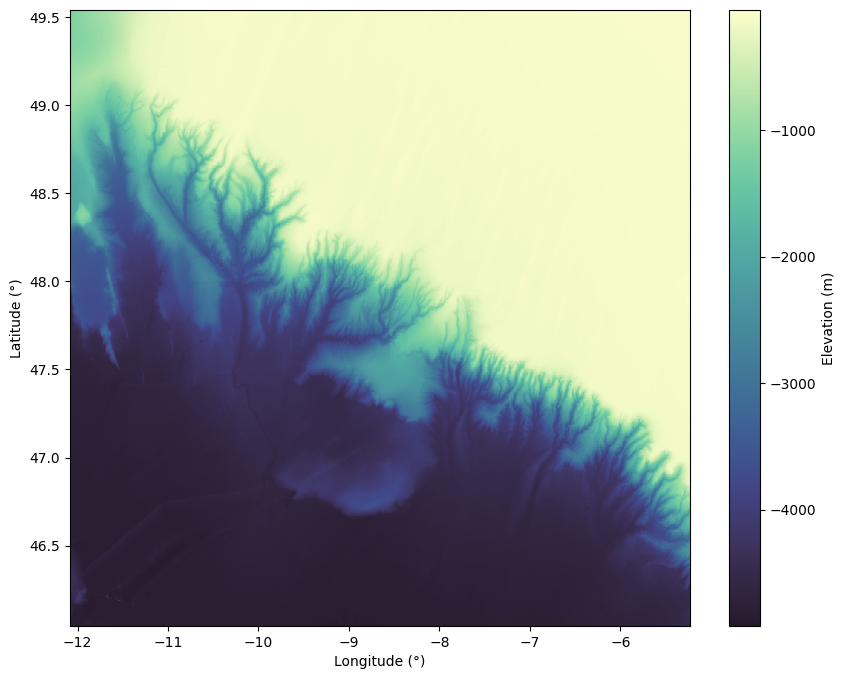

In [5]:
# Simple elevation plot
bath.plot_bathy()

### Adding contours

All plot methods support an optional `contours` parameter to overlay bathymetric contour lines.

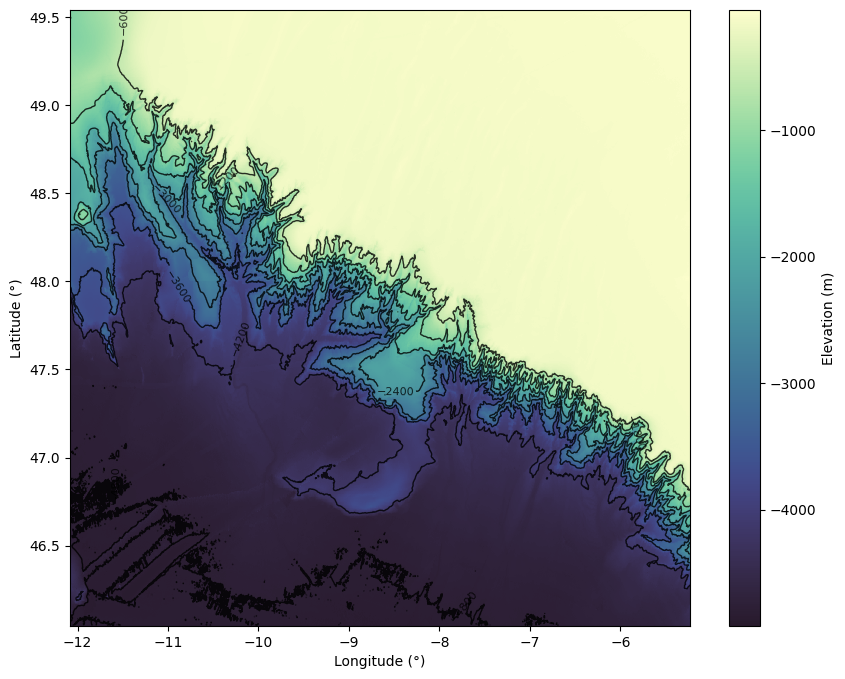

In [6]:
# Simple plot with 10 evenly-spaced contour levels
bath.plot_bathy(contours=10)

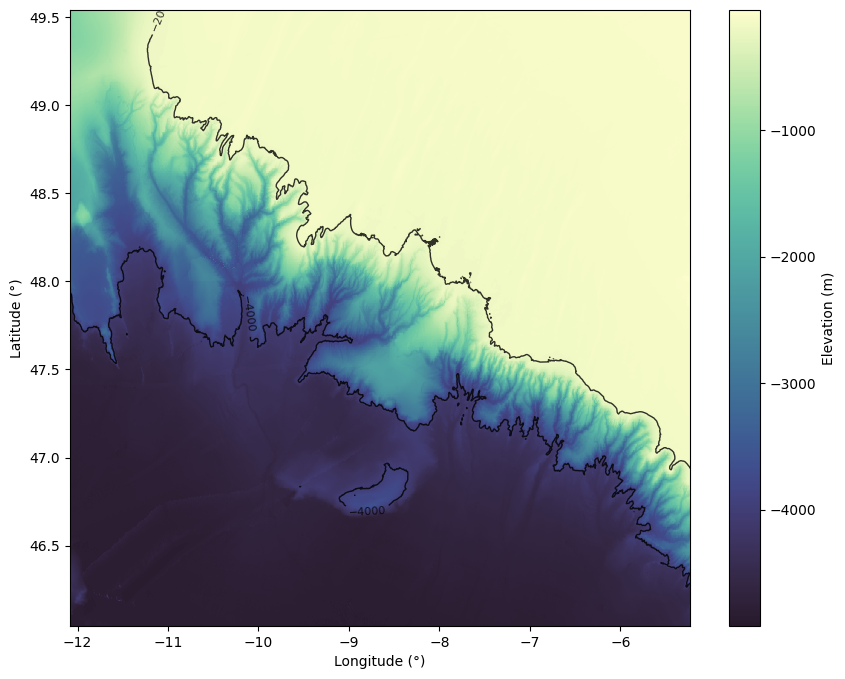

In [7]:
# Hillshade with specific depth contours (shelf edge, slope, abyssal depths)
bath.plot_bathy(contours=[-200, -4000])

### Other visualizations

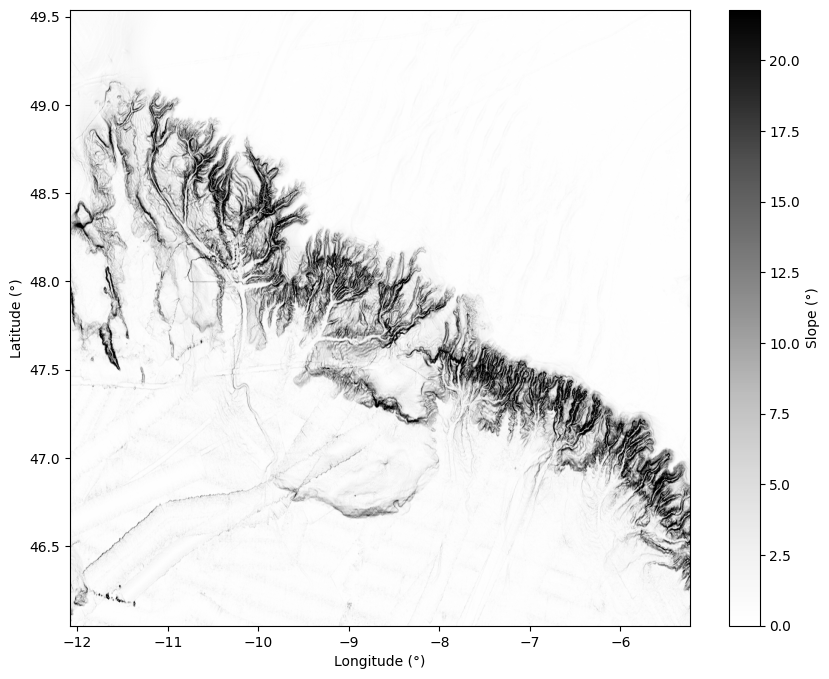

In [8]:
# Seafloor slope
bath.plot_slope()

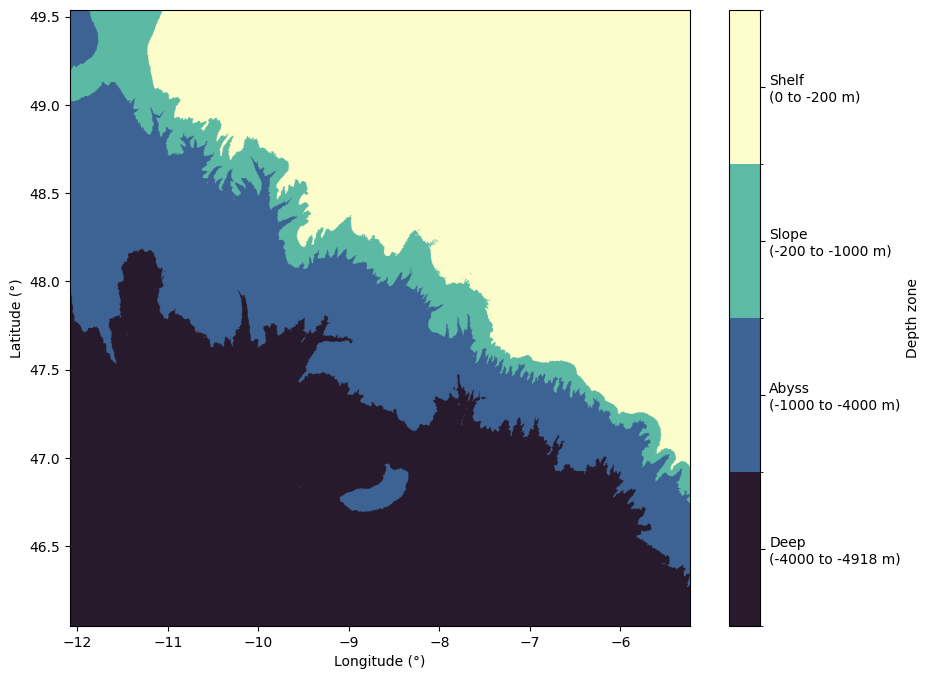

In [9]:
# Depth zones (shelf, slope, abyss)
bath.plot_depth_zones()

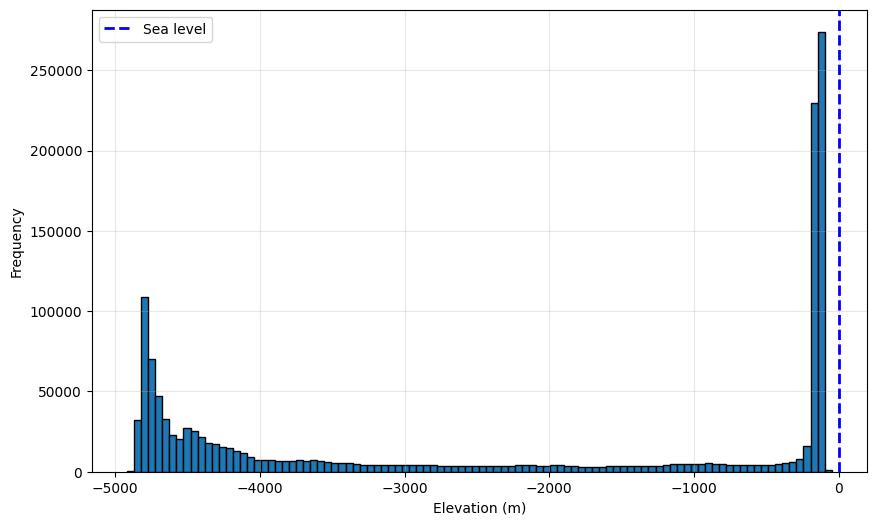

In [10]:
# Elevation histogram
bath.plot_histogram(bins=100)

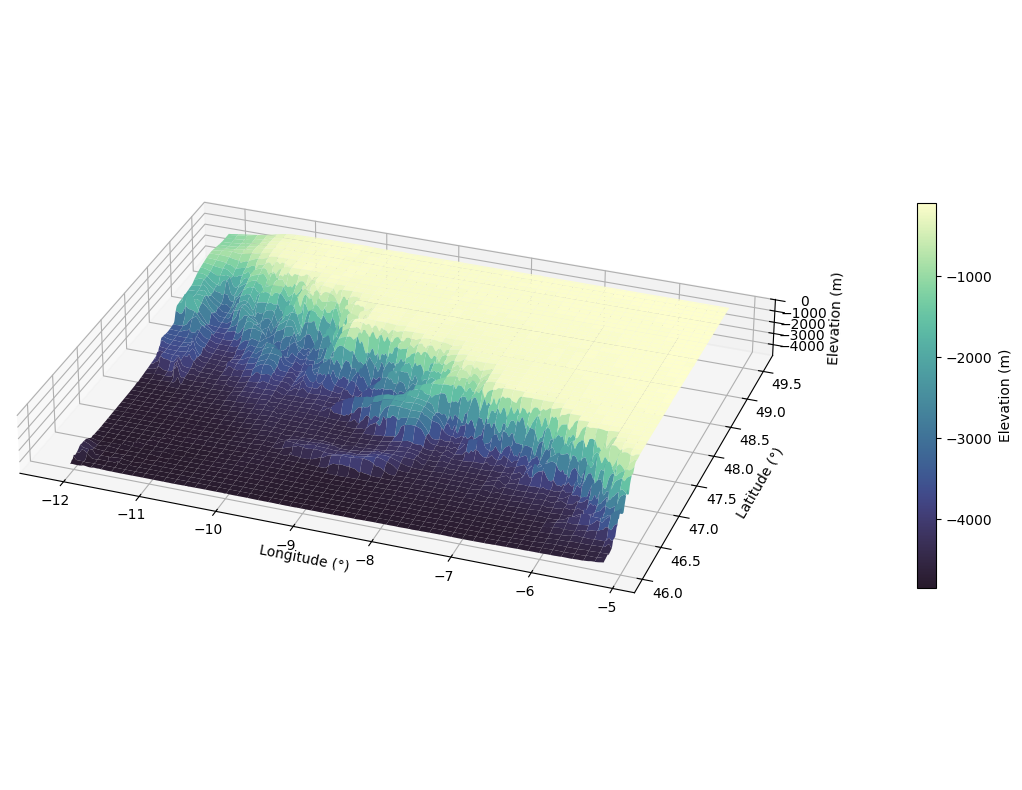

In [11]:
# 3D surface plot
bath.plot_surface3d(stride=1, vertical_exaggeration=0.1, smooth=5, elev=30, azim=-70)

## Hypsometric analysis

The hypsometric index (HI) quantifies the distribution of elevation within a region. It ranges from 0 to 1, where values below 0.5 indicate concave hypsometry (more area at lower elevations) and values above 0.5 indicate convex hypsometry.

In [12]:
# Calculate hypsometric index
hi = bath.hypsometric_index()
print(f"Hypsometric Index: {hi:.3f}")

Hypsometric Index: 0.534


In [13]:
# Get the raw hypsometric curve data
rel_area, rel_elev = bath.hypsometric_curve()
print(f"Relative area shape: {rel_area.shape}")
print(f"Relative elevation shape: {rel_elev.shape}")

Relative area shape: (100,)
Relative elevation shape: (100,)


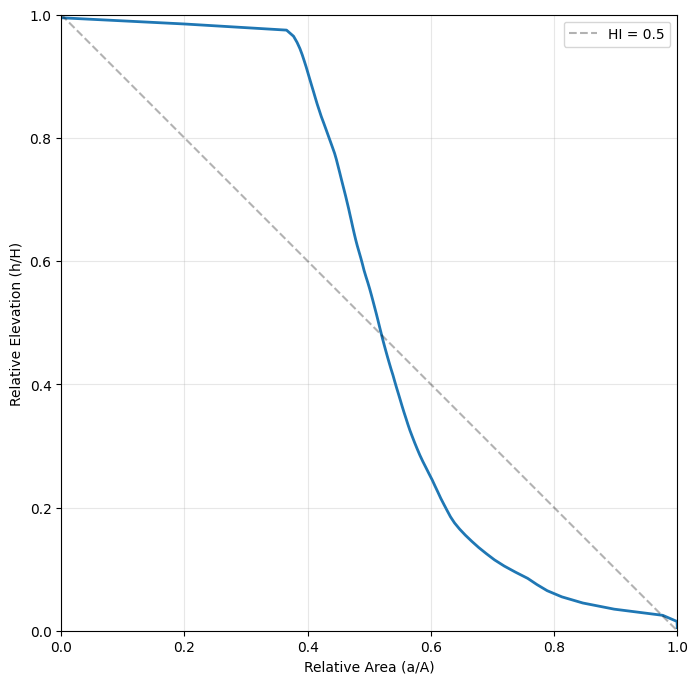

In [14]:
# Plot the hypsometric curve
bath.plot_hypsometric_curve()